In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import pywt

#Primero leemos todos los archivos txt
array_reposo = np.genfromtxt("Reposo_EKG.txt",delimiter="	",skip_header = 2)
array_respiracion=np.genfromtxt("/content/Respiración_EKG.txt",delimiter="	",skip_header = 2)
array_ejercicio=np.genfromtxt("/content/Ejercicio_EKG.txt",delimiter="	",skip_header = 2)

#Guardamos los valores de cada caso a un tipo de array
valores_reposo=array_reposo[:,-2]
valores_respiracion=array_respiracion[:,-2]
valores_ejercicio=array_ejercicio[:,-2]

#Determinamos la longitud de cada arreglo
cantidad_reposo=np.size(valores_reposo);
cantidad_respiracion=np.size(valores_respiracion);
cantidad_ejercicio=np.size(valores_ejercicio);

#Creamos los vectores de tiempo para cada caso
tiempo_reposo=np.arange(0,cantidad_reposo)
tiempo_reposo=tiempo_reposo/1000

tiempo_respiracion=np.arange(0,cantidad_respiracion)
tiempo_respiracion=tiempo_respiracion/1000

tiempo_ejercicio=np.arange(0,cantidad_ejercicio)
tiempo_ejercicio=tiempo_ejercicio/1000

#Convertimos los valores ADC a voltaje (mV)
valores_reposo=(((valores_reposo/1024)-0.5)*3.3)/(1100)
valores_reposo=valores_reposo*1000

valores_respiracion=(((valores_respiracion/1024)-0.5)*3.3)/(1100)
valores_respiracion=valores_respiracion*1000

valores_ejercicio=(((valores_ejercicio/1024)-0.5)*3.3)/(1100)
valores_ejercicio=valores_ejercicio*1000



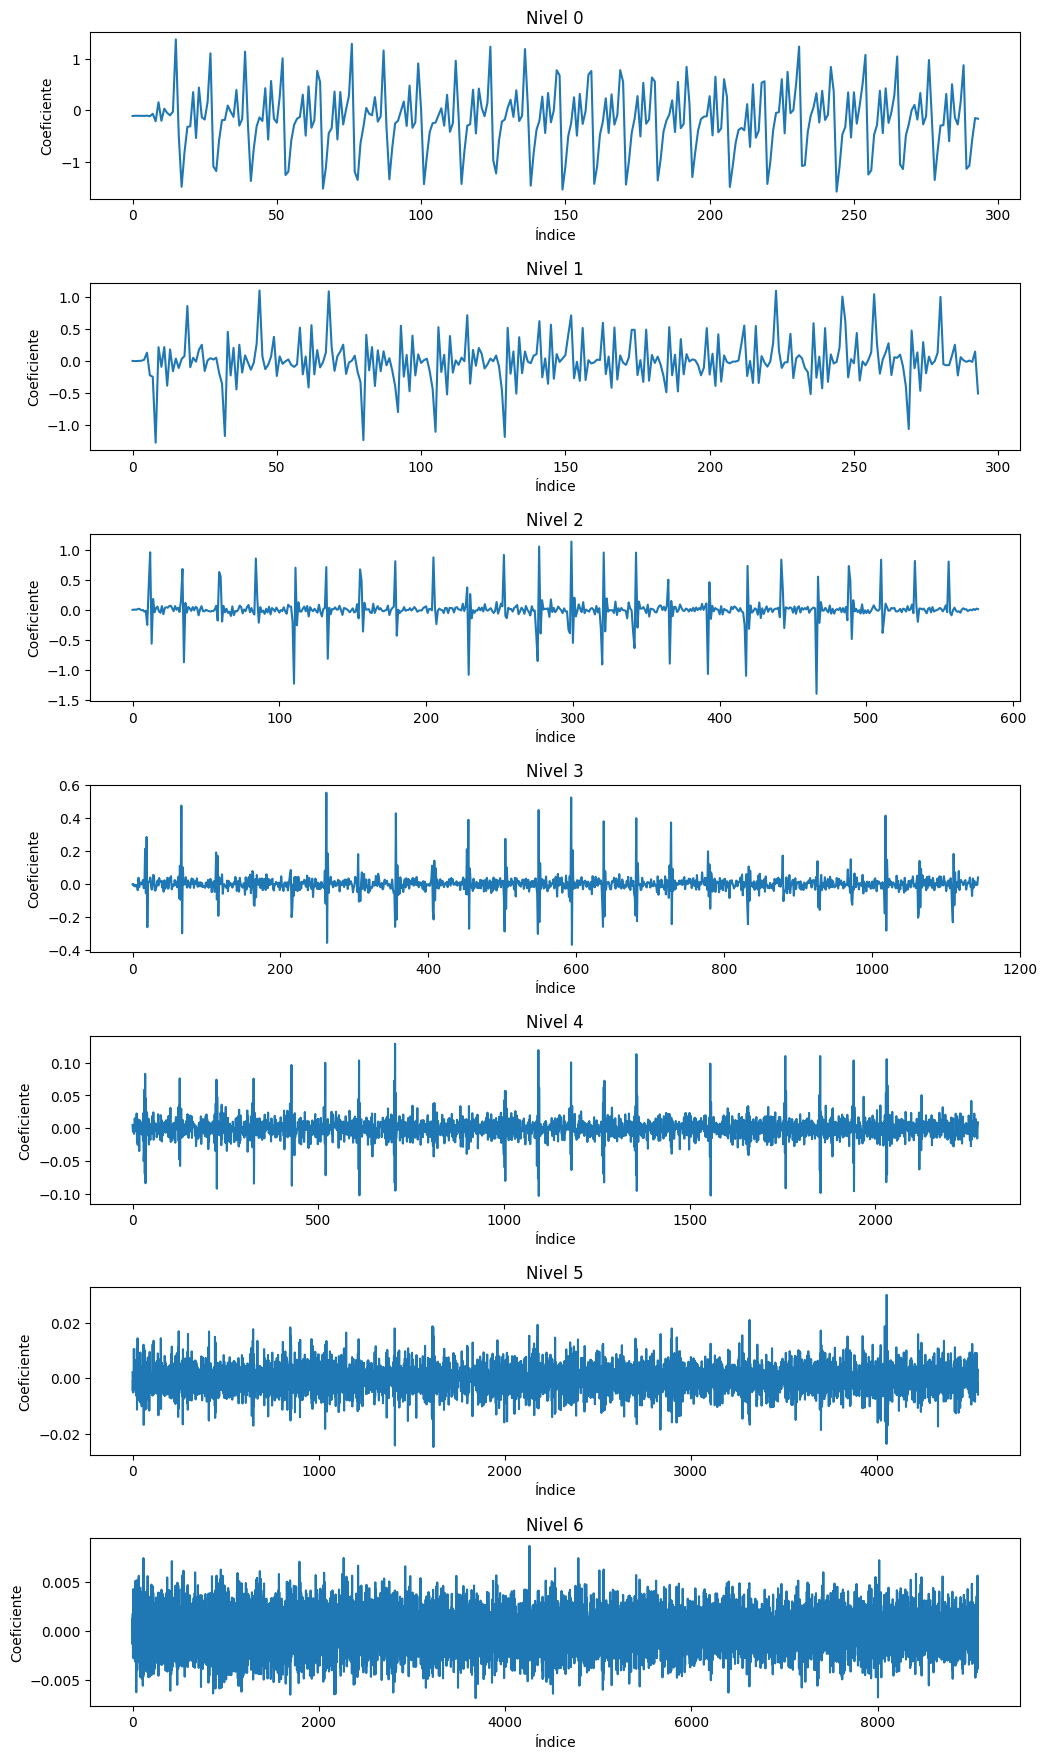

In [3]:
#COMENZAREMOS CON LA PRIMERA SEÑAL (EN REPOSO)

#De acuerdo a la literatura, se utilizo un wavelet Daubechie
coeffs = pywt.wavedec(valores_reposo, 'db6', level=6)

# Visualizar todos los niveles de la wavelet
plt.figure(figsize=(12, 25))
for i, coeff in enumerate(coeffs):
    plt.subplot(len(coeffs) + 1, 1, i + 1)
    plt.plot(coeff)
    plt.title(f'Nivel {i}')
    plt.xlabel('Índice')
    plt.ylabel('Coeficiente')

plt.subplots_adjust(hspace=0.5)

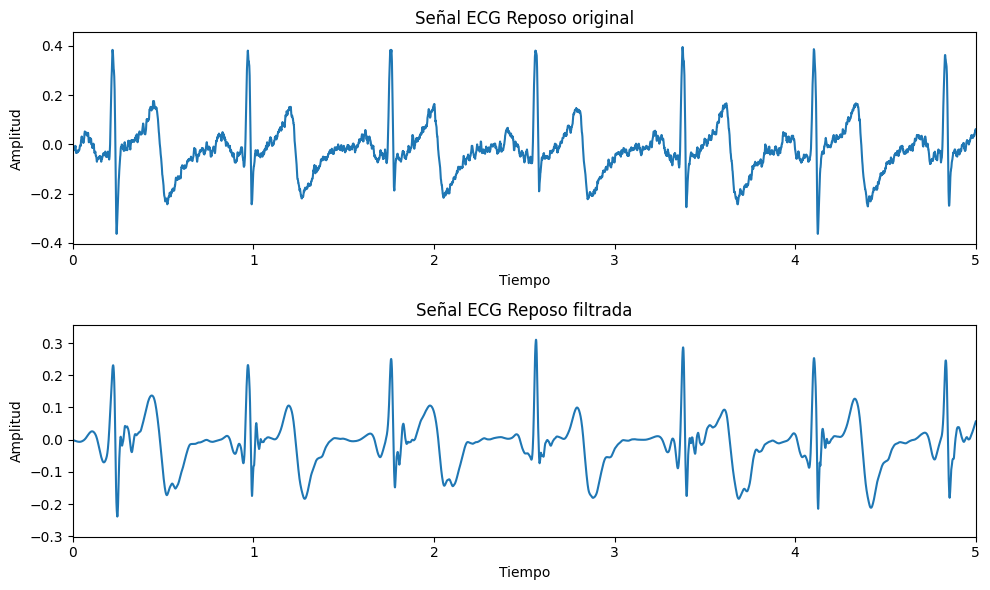

In [10]:
#FILTRAR SEÑAL ECG REPOSO FILTRADA
#Para el filtrado de la senal, se hizo uso de un umbral (Threshold)
#El valor de este umbral fue de 0.22 en la literatura, ya que mostraba los resultados mas optimos
umbral = 0.22
coeffs_umbral = [pywt.threshold(c, umbral, mode='soft') for c in coeffs]

ecg_reposo_filtrado = pywt.waverec(coeffs_umbral, 'db6')

# Visualizar la señal original y la señal filtrada
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(tiempo_reposo, valores_reposo)
plt.title('Señal ECG Reposo original')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.xlim([0,5])

plt.subplot(2, 1, 2)
plt.plot(tiempo_reposo, ecg_reposo_filtrado)
plt.title('Señal ECG Reposo filtrada')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.xlim([0,5])

plt.tight_layout()
plt.show()

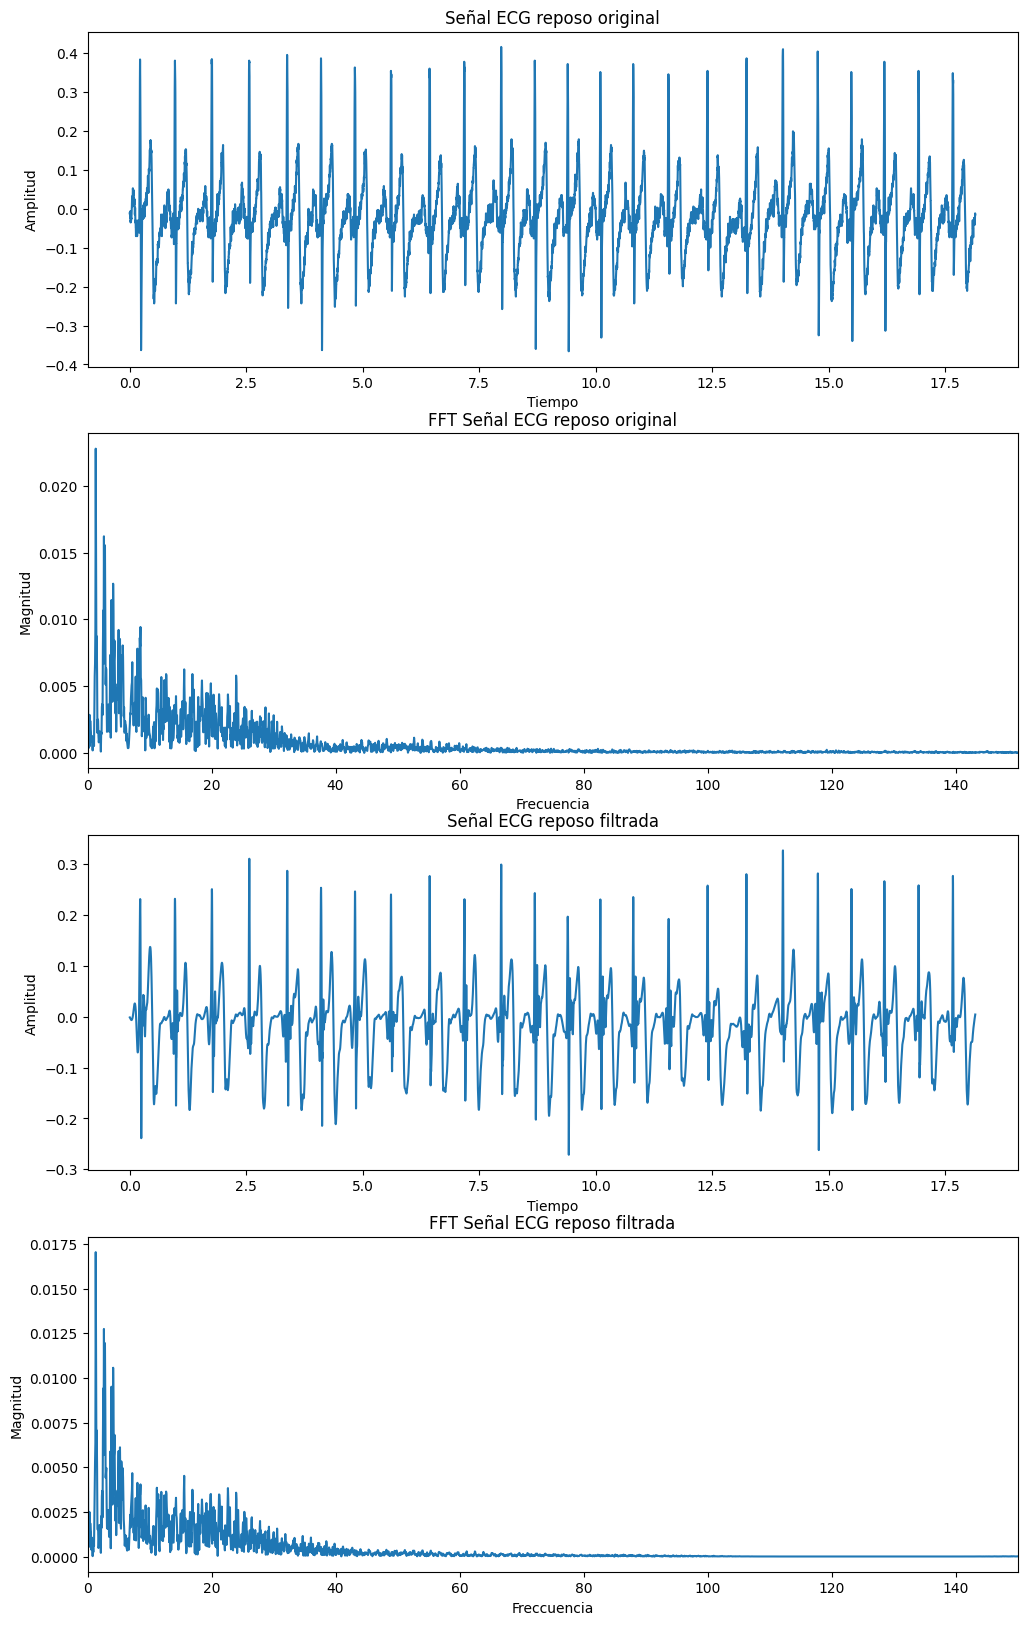

In [17]:
plt.figure(figsize=(12, 20))
plt.subplot(4, 1, 1)
plt.plot(tiempo_reposo, valores_reposo)
plt.title('Señal ECG reposo original')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')

plt.subplot(4, 1, 2)
plt.magnitude_spectrum(valores_reposo, Fs=1000)
plt.xlim(0, 150)
plt.title('FFT Señal ECG reposo original')
plt.xlabel('Frecuencia')
plt.ylabel('Magnitud')

plt.subplot(4, 1, 3)
plt.plot(tiempo_reposo, ecg_reposo_filtrado)
plt.title('Señal ECG reposo filtrada')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')

plt.subplot(4, 1, 4)
plt.magnitude_spectrum(ecg_reposo_filtrado, Fs=1000)
plt.xlim(0, 150)
plt.title('FFT Señal ECG reposo filtrada')
plt.xlabel('Freccuencia')
plt.ylabel('Magnitud')
plt.show()

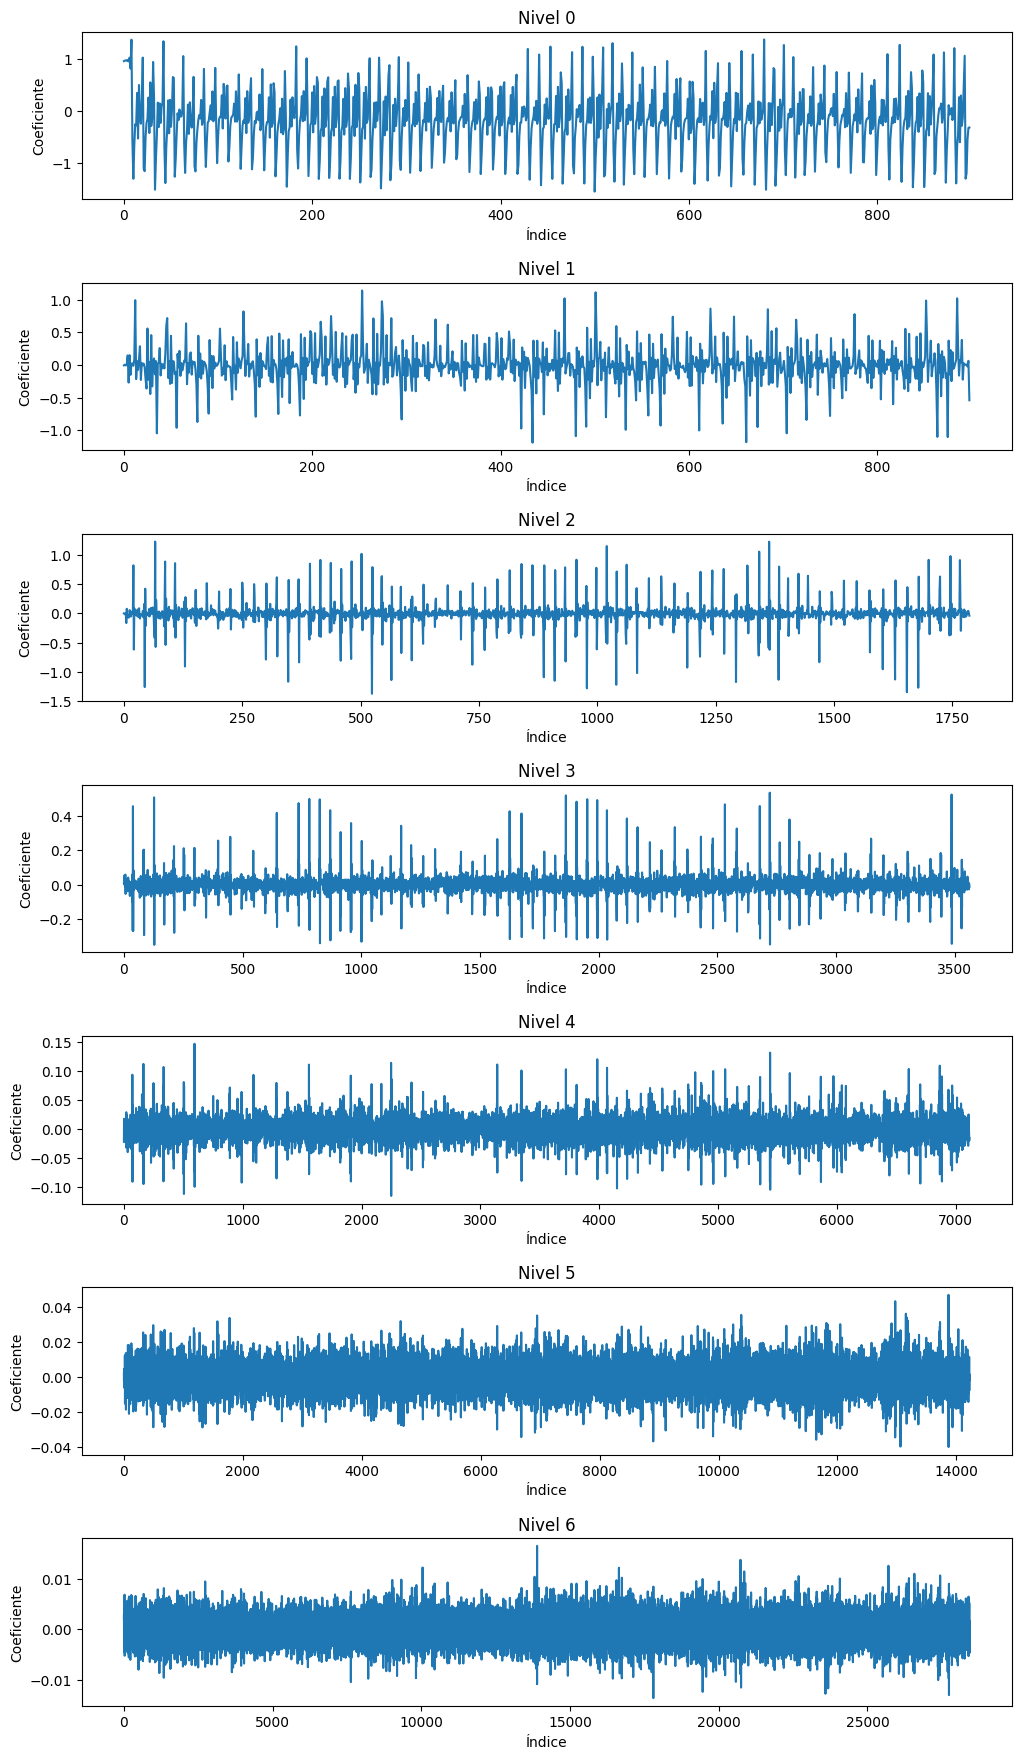

In [13]:
#Repetimos el proceso con la senal en respiracion
coeffs_respiracion = pywt.wavedec(valores_respiracion, 'db6', level=6)

# Visualizar todos los niveles de la wavelet
plt.figure(figsize=(12, 25))
for i, coeff in enumerate(coeffs_respiracion):
    plt.subplot(len(coeffs_respiracion) + 1, 1, i + 1)
    plt.plot(coeff)
    plt.title(f'Nivel {i}')
    plt.xlabel('Índice')
    plt.ylabel('Coeficiente')

plt.subplots_adjust(hspace=0.5)


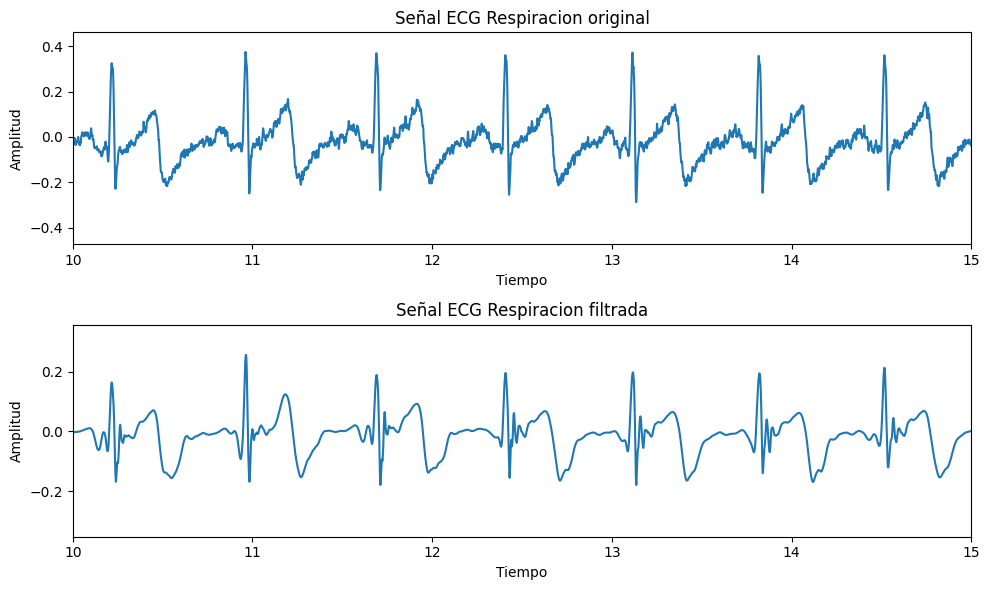

In [14]:
#FILTRAR SEÑAL ECG RESPIRACION FILTRADA
#Para el filtrado de la senal, se hizo uso de un umbral (Threshold)
#El valor de este umbral fue de 0.22 en la literatura, ya que mostraba los resultados mas optimos
umbral = 0.22
coeffs_umbral = [pywt.threshold(c, umbral, mode='soft') for c in coeffs_respiracion]

ecg_respiracion_filtrado = pywt.waverec(coeffs_umbral, 'db6')

# Visualizar la señal original y la señal filtrada
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(tiempo_respiracion, valores_respiracion)
plt.title('Señal ECG Respiracion original')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.xlim([10,15])

plt.subplot(2, 1, 2)
plt.plot(tiempo_respiracion, ecg_respiracion_filtrado)
plt.title('Señal ECG Respiracion filtrada')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.xlim([10,15])

plt.tight_layout()
plt.show()

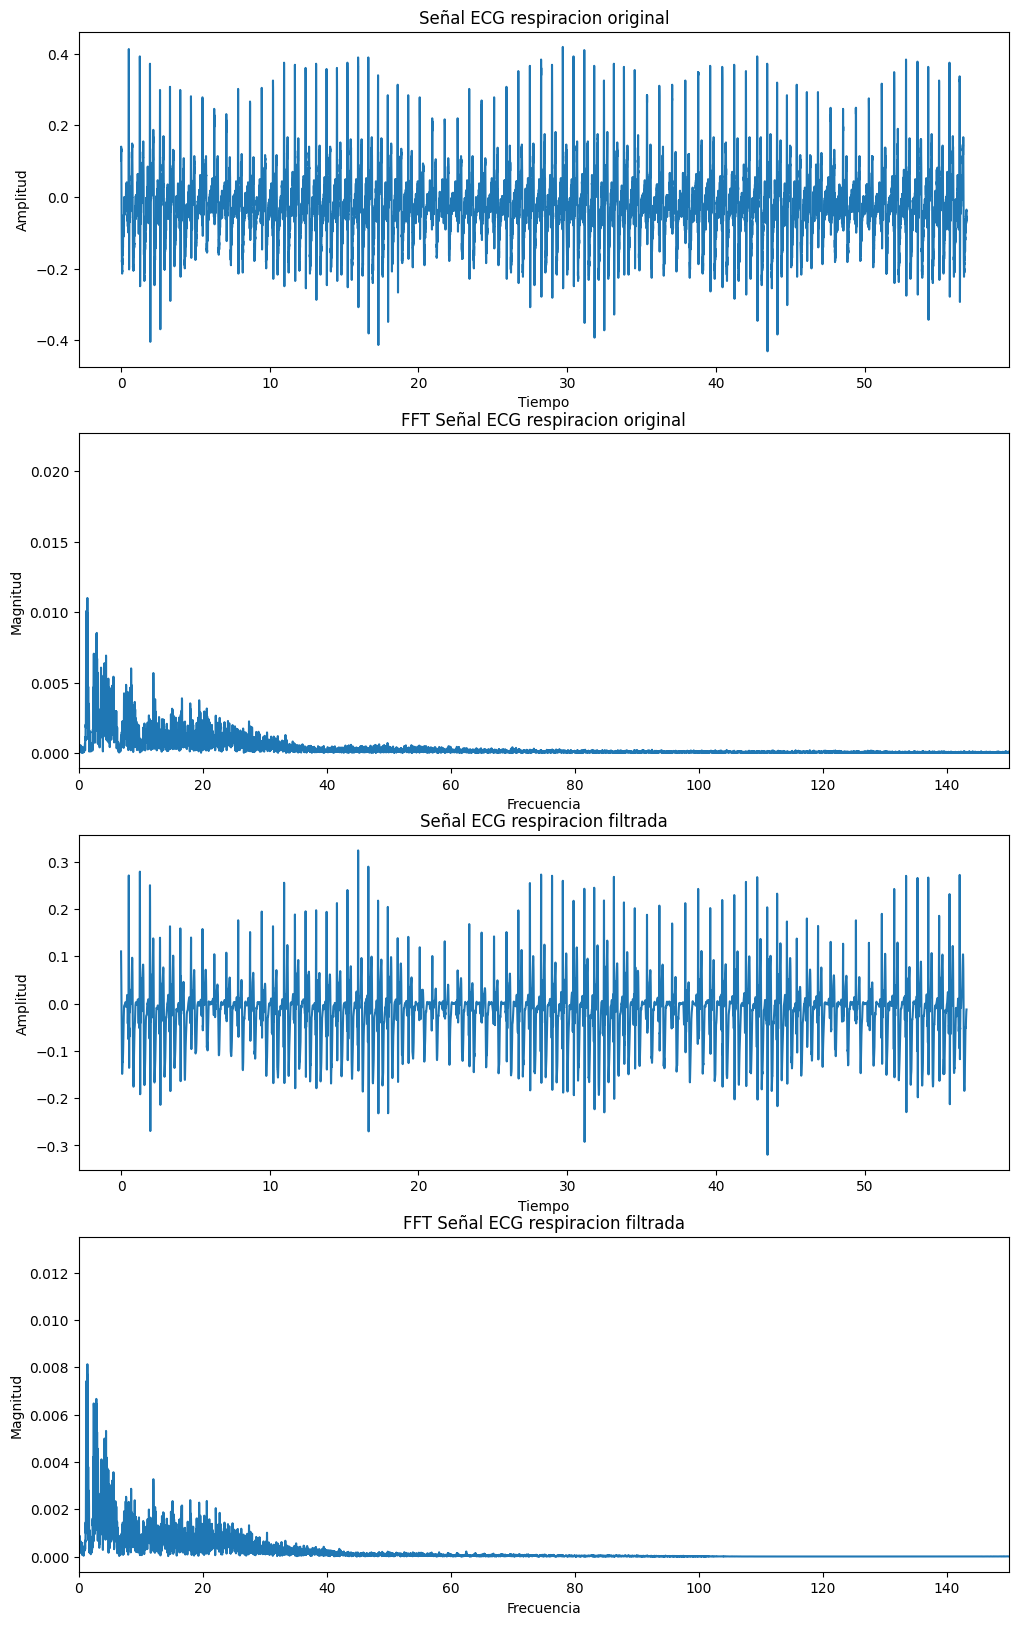

In [16]:
plt.figure(figsize=(12, 20))
plt.subplot(4, 1, 1)
plt.plot(tiempo_respiracion, valores_respiracion)
plt.title('Señal ECG respiracion original')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')

plt.subplot(4, 1, 2)
plt.magnitude_spectrum(valores_respiracion, Fs=1000)
plt.xlim(0, 150)
plt.title('FFT Señal ECG respiracion original')
plt.xlabel('Frecuencia')
plt.ylabel('Magnitud')

plt.subplot(4, 1, 3)
plt.plot(tiempo_respiracion, ecg_respiracion_filtrado)
plt.title('Señal ECG respiracion filtrada')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')

plt.subplot(4, 1, 4)
plt.magnitude_spectrum(ecg_respiracion_filtrado, Fs=1000)
plt.xlim(0, 150)
plt.title('FFT Señal ECG respiracion filtrada')
plt.xlabel('Frecuencia')
plt.ylabel('Magnitud')
plt.show()

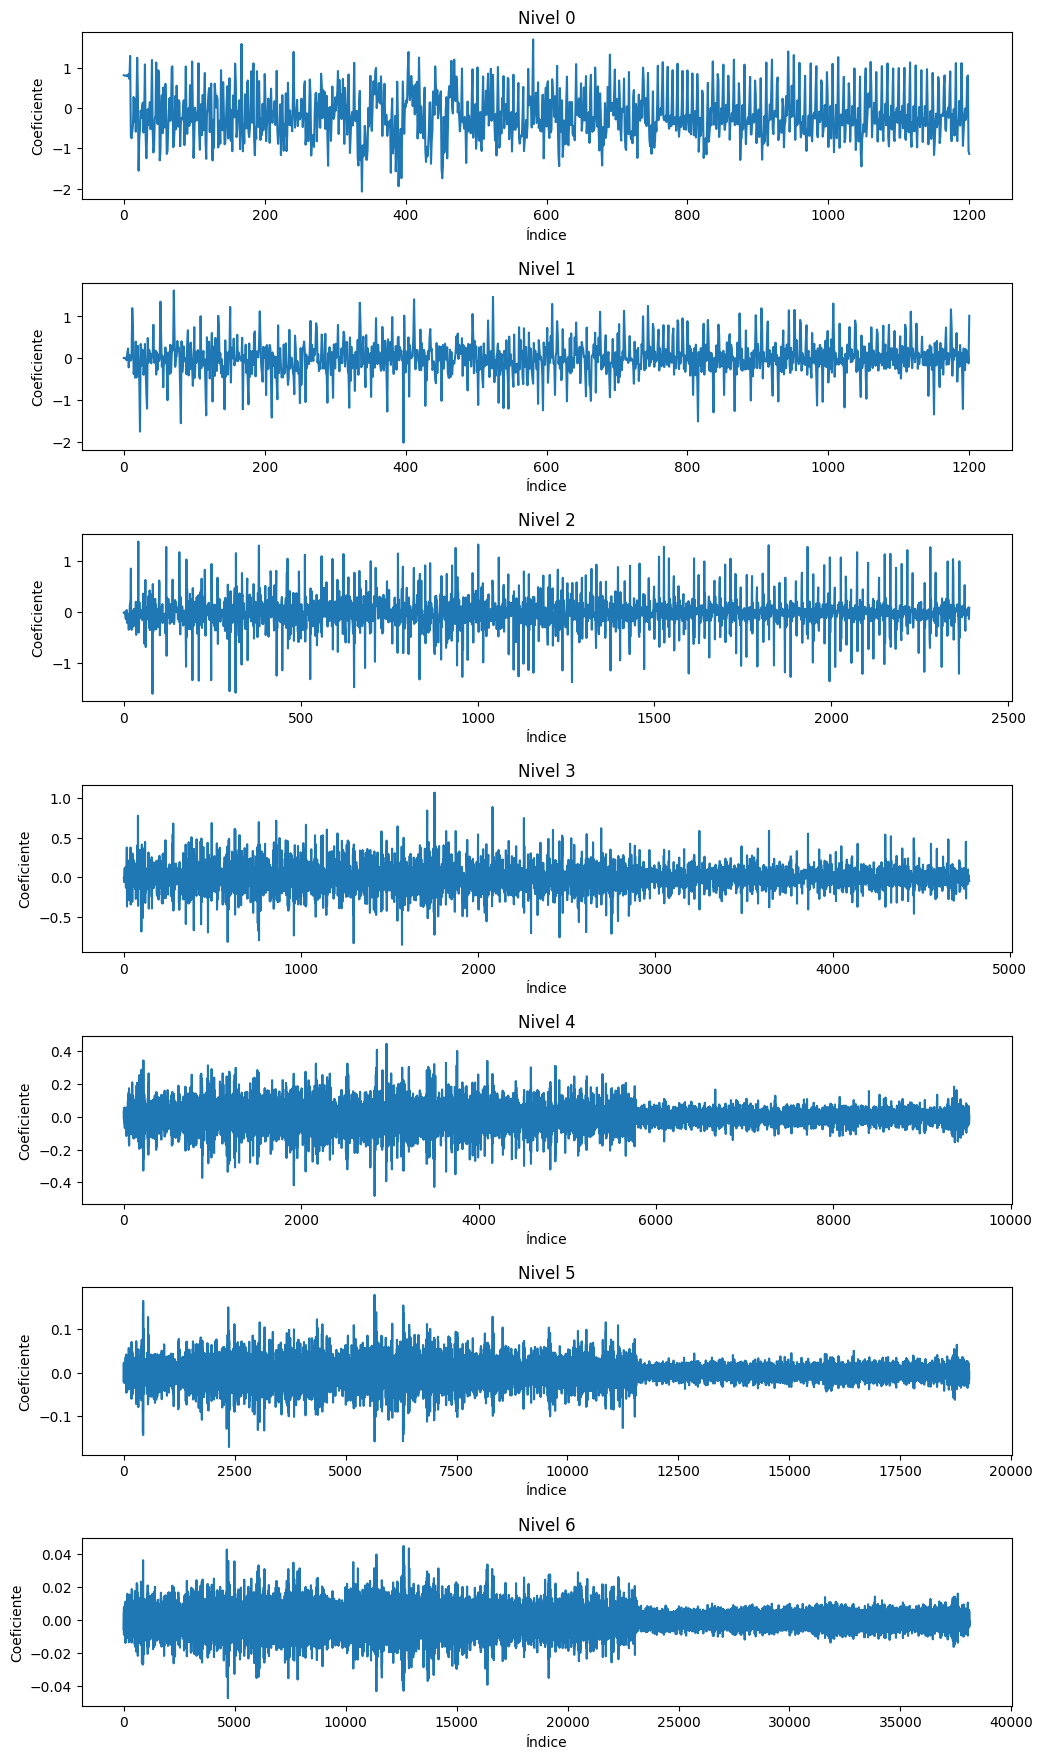

In [18]:
#Ahora haremos el filtro con la senal tras ejercicio
coeffs_ejercicio = pywt.wavedec(valores_ejercicio, 'db6', level=6)

# Visualizar todos los niveles de la wavelet
plt.figure(figsize=(12, 25))
for i, coeff in enumerate(coeffs_ejercicio):
    plt.subplot(len(coeffs_ejercicio) + 1, 1, i + 1)
    plt.plot(coeff)
    plt.title(f'Nivel {i}')
    plt.xlabel('Índice')
    plt.ylabel('Coeficiente')

plt.subplots_adjust(hspace=0.5)


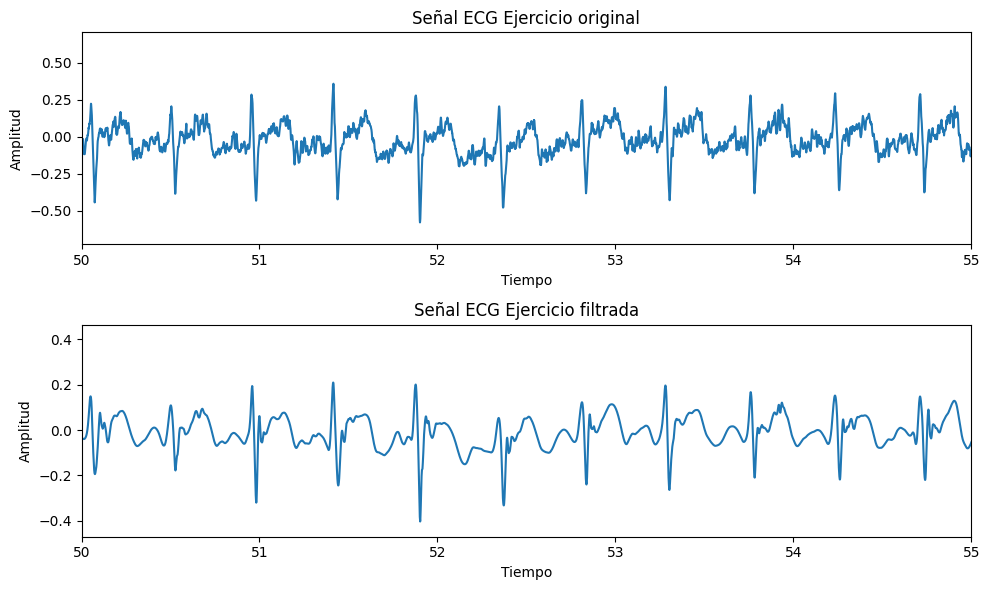

In [19]:
umbral = 0.22
coeffs_umbral = [pywt.threshold(c, umbral, mode='soft') for c in coeffs_ejercicio]

ecg_ejercicio_filtrado = pywt.waverec(coeffs_umbral, 'db6')

# Visualizar la señal original y la señal filtrada
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(tiempo_ejercicio, valores_ejercicio)
plt.title('Señal ECG Ejercicio original')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.xlim([50,55])

plt.subplot(2, 1, 2)
plt.plot(tiempo_ejercicio, ecg_ejercicio_filtrado)
plt.title('Señal ECG Ejercicio filtrada')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.xlim([50,55])

plt.tight_layout()
plt.show()

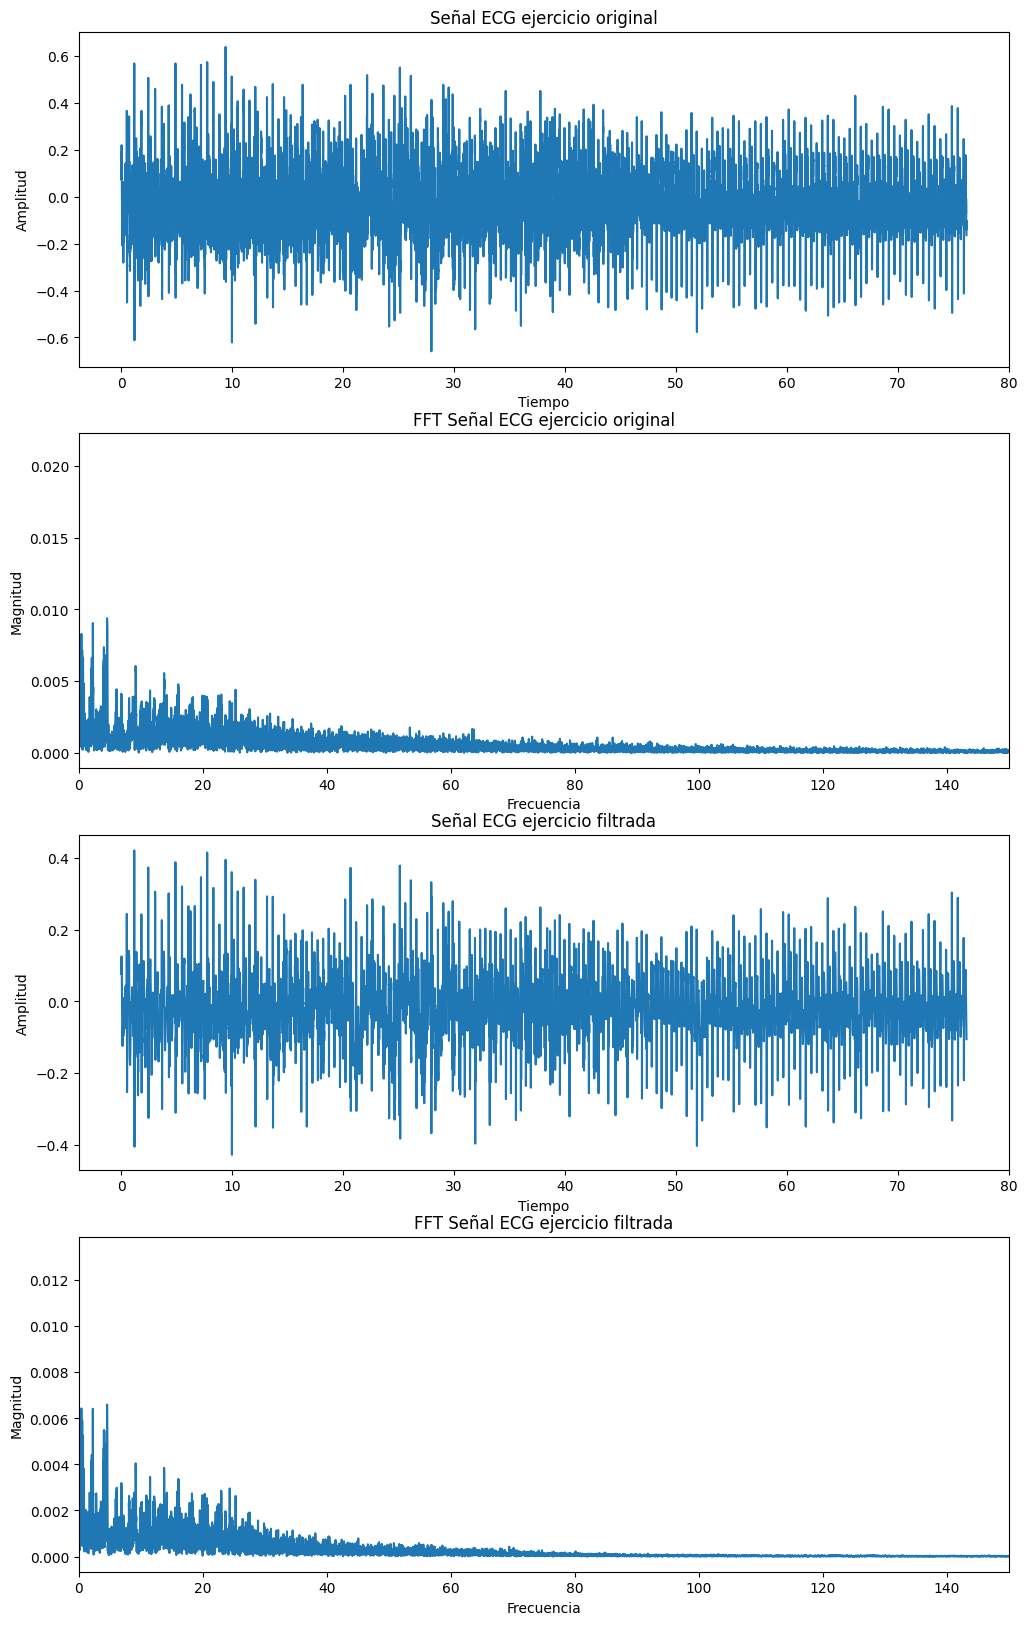

In [20]:
plt.figure(figsize=(12, 20))
plt.subplot(4, 1, 1)
plt.plot(tiempo_ejercicio, valores_ejercicio)
plt.title('Señal ECG ejercicio original')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')

plt.subplot(4, 1, 2)
plt.magnitude_spectrum(valores_ejercicio, Fs=1000)
plt.xlim(0, 150)
plt.title('FFT Señal ECG ejercicio original')
plt.xlabel('Frecuencia')
plt.ylabel('Magnitud')

plt.subplot(4, 1, 3)
plt.plot(tiempo_ejercicio, ecg_ejercicio_filtrado)
plt.title('Señal ECG ejercicio filtrada')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')

plt.subplot(4, 1, 4)
plt.magnitude_spectrum(ecg_ejercicio_filtrado, Fs=1000)
plt.xlim(0, 150)
plt.title('FFT Señal ECG ejercicio filtrada')
plt.xlabel('Frecuencia')
plt.ylabel('Magnitud')
plt.show()